Experiment 2
Generation of Pulse Code Modulation and its reconstruction.

In [13]:
# Libraries Required for the given experiment
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import pandas as pd
from scipy import signal

In [14]:
#functions
# The purpose of this function is to 
def rounding(value):
    answer = mt.floor(value) + mt.ceil(value)
    return answer / 2

# The purpose of this function is to provide with the quantized value of the signal
def Uniform_quantizater(input, level):
    step_size = 2 * max(input) / (level-1)
    Quantized_signal = [rounding(i / step_size) * step_size for i in input]
    return Quantized_signal

# The purpose of this function is to calculate SQNR through plot
def SQNR(signal_1, signal_2):
    signal_power = np.mean(signal_1**2)
    noise_power = np.mean((signal_1 - signal_2)**2)
    return 10 * np.log10(signal_power / noise_power)

#The purpose of this signal is to calculate the SQNR theoretically
def SQNR_theo(bits):
    return (6 *bits) + 1.76

#The purpose of this function is to tabulate the different quantisation levels
def Tabular(Signal): 
    solution = pd.DataFrame({'Levels':Signal})
    solution = solution.drop_duplicates().reset_index(drop=True)
    solution = solution.drop(0)
    return solution

#The purpose of this function is to assign a binary number to ech of the quantization level
def Binary(level,bits):
    X8 = []
    for i in range(level):
        num = bin(i).lstrip('0b').zfill(bits) 
        arr1 = []
        arr1 = [int(j) for j in num]   
        X8.append(arr1)
    return X8

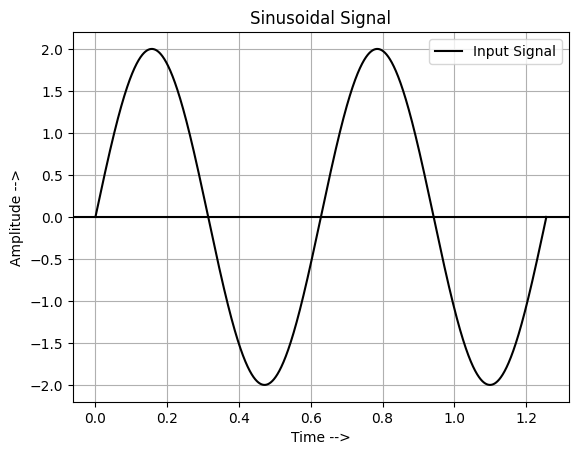

In [15]:
levels = 8  #The levels of the quantization signal
bits = int(np.log2(levels)) #The number of bits required to represent the levels
Amp = 2   #Amplitude of the sinusoidal signal
W_ss = 10 #Frequency of the sinusoidal signal
W_sampling = 1000 # According to Nyquist criteria W_samling>=2*W_ss
T_cycle = 2 *np.pi / W_ss #Time period of the signal
t_org = np.linspace(0,2 * T_cycle, 5000) #List containing points to plot the signal at
x = Amp * np.sin(W_ss * t_org) #Original Signal
plt.plot(t_org,x, color = 'black')
plt.grid()
plt.title('Sinusoidal Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')
plt.legend(['Input Signal'])
plt.show()

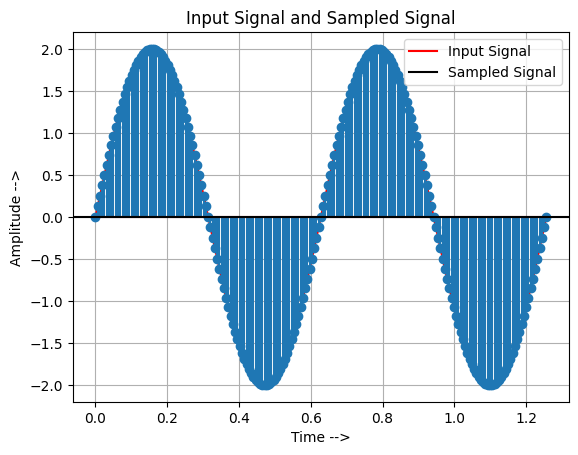

In [16]:
plt.plot(t_org,x, color = 'red')

f_sampling = W_sampling / (2 * np.pi)  #Sampling frequency
T_sampling = 1 / f_sampling # Sampling Period
cycles = 2
t = np.arange(0, 100 * cycles * T_sampling, T_sampling) #List containing points to plot the signal at

X = Amp * np.sin(W_ss * t) #Sampled signal
plt.stem(t,X)
plt.grid()
plt.title('Input Signal and Sampled Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')
plt.legend(['Input Signal', 'Sampled Signal'])
plt.show()

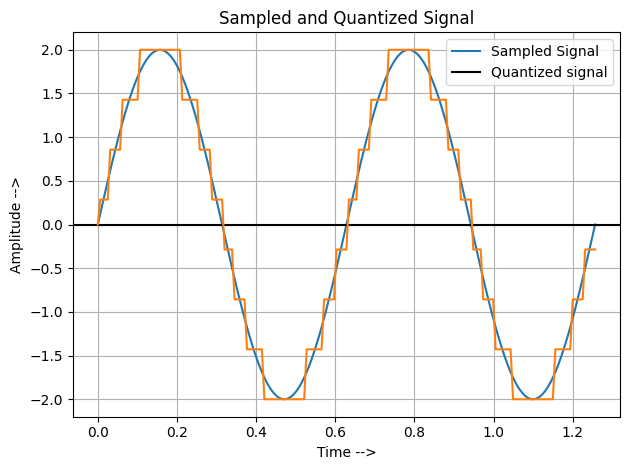

In [17]:
X = Amp * np.sin( W_ss * t)
plt.plot(t,X)
plt.grid()
plt.title('Sampled and Quantized Signal')
plt.xlabel('Time -->')
plt.ylabel('Amplitude -->')
plt.axhline(y = 0, color = 'k')

# Quantized level
Quantized_signal = Uniform_quantizater(X,levels) # Inorder to obtained the quantized signal
plt.plot(t,Quantized_signal)
plt.legend(['Sampled Signal','Quantized signal'])
plt.tight_layout()

In [18]:
quantized_signal = Tabular(Quantized_signal) #This is to display the quantized signal in tabular manner
quantized_signal

,Levels
1,0.285714
2,0.857143
3,1.428571
4,2.000000
5,-0.285714
6,-0.857143
7,-1.428571
8,-2.000000


In [19]:
# SQNR
practical_SQNR = SQNR(X ,Quantized_signal) #Practical Calculation of SQNR
print(practical_SQNR)
theoretical_SQNR = SQNR_theo(bits) #Theoretical Calculation of SQNR
print(theoretical_SQNR)
Error = theoretical_SQNR - practical_SQNR# The difference between the 2 calculated SQNR
print(Error)

19.281182589656584
19.76
0.4788174103434173


In [20]:
quantization_levels = np.array([quantized_signal.Levels[i+1] for i in range(levels)]) #This is to store the quantized values in an array

X_bin = Binary(levels,bits) #TO find the corrosponding binary number for the level
Encoded = pd.DataFrame({'quantization level': quantization_levels.tolist(), 'Binary Representation': np.array(X_bin).tolist()})
Encoded #To obtain the Final Table with the levels and its respective binary representation

,quantization level,Binary Representation
0,0.285714,"[0, 0, 0]"
1,0.857143,"[0, 0, 1]"
2,1.428571,"[0, 1, 0]"
3,2.000000,"[0, 1, 1]"
4,-0.285714,"[1, 0, 0]"
5,-0.857143,"[1, 0, 1]"
6,-1.428571,"[1, 1, 0]"
7,-2.000000,"[1, 1, 1]"


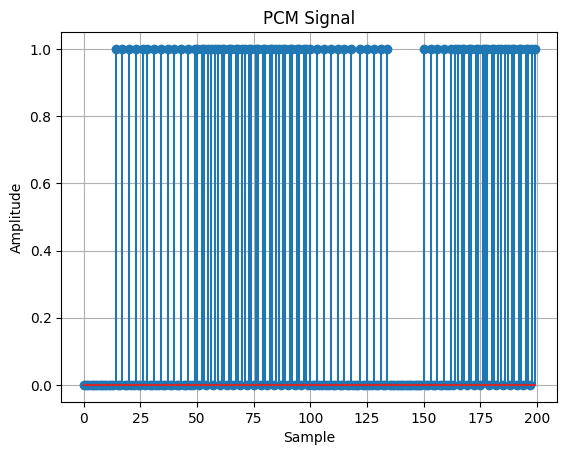

In [21]:
pcm = []
#The purpose of the following block of code is to calculate the PCM of the signal
for i in Quantized_signal:
    for index, level in Encoded.iterrows():
        if i == level["quantization level"]:
            pcm.extend(level["Binary Representation"])

plt.stem(pcm[0:200]) #We have restricted the plot inorder to view the PCM properly
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('PCM Signal')
plt.grid()
plt.show()

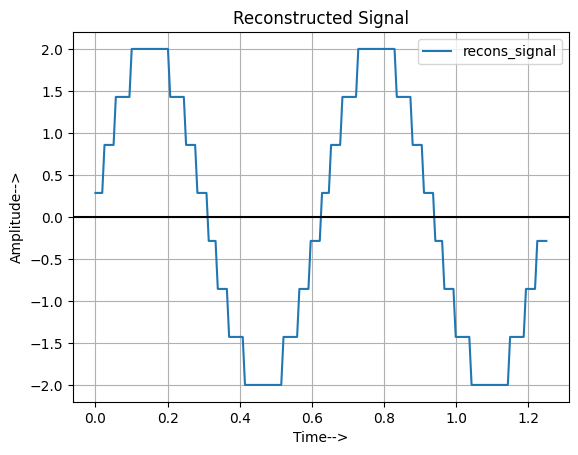

In [22]:
reconstructed_signal = []
# The purpose of the following block of code is to reconstruct the signal
for i in range(0, len(pcm), bits):
    binary_sequence = pcm[i:i+bits]
    quantization_level = Encoded.loc[Encoded['Binary Representation'].apply(lambda x: x == binary_sequence), 'quantization level'].values[0]
    reconstructed_signal.append(quantization_level)
t1 = np.delete(t,-1)
plt.plot(t1,reconstructed_signal)
plt.title('Reconstructed Signal')
plt.xlabel('Time-->')
plt.ylabel('Amplitude-->')
plt.axhline(y = 0, color = 'k')
plt.legend(['recons_signal'], loc = 'upper right')
plt.grid()
plt.show()

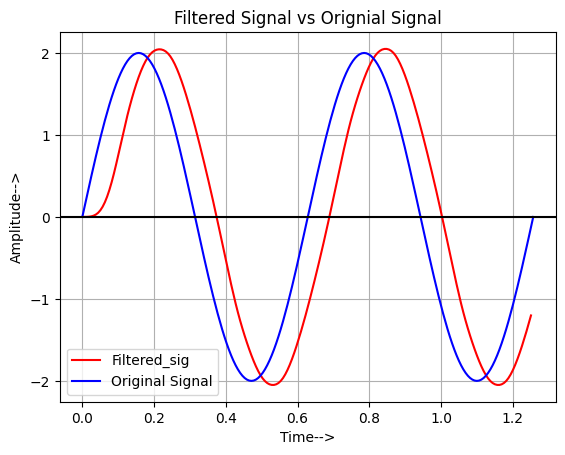

In [23]:
#Filter Parameters
Fc = 100  # Cutoff frequency of the low pass filter
Filter_order = 5  # Order of the filter
fs = 2000  # Sampling frequecny

# Normalize the cutoff frequency
NY_freq = 0.5 * fs
normalized_cutoff_freq = Fc / NY_freq 

# Design the low pass filter
b, a = signal.butter(Filter_order, normalized_cutoff_freq, btype='low', analog=False)

# Apply the filter to the reconstructed signal
filtered_signal = signal.lfilter(b, a, reconstructed_signal)
plt.plot(t1,filtered_signal, color= 'Red')
plt.plot(t,X, color = 'blue')
plt.title('Filtered Signal vs Orignial Signal')
plt.legend(['Filtered_sig', 'Original Signal'])
plt.xlabel('Time-->')
plt.ylabel('Amplitude-->')
plt.axhline(y = 0, color ='Black')
plt.grid()